<a href="https://colab.research.google.com/github/arzss-code/jobsheet-machine-learning/blob/main/Deep_Computer_Vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN for Digit Recognizer (MNIST) > 99% Accuracy

### Atsiila Arya Nabiih - 4.33.23.1.04 - TI-2B

---



Dengan menggunakan pengetahuan tentang CNN pada bab ini, silakan susun Deep Neural Network sendiri untuk mendapatkan tingkat akurasi lbih dari 99% pada dataset berikut:
https://www.kaggle.com/c/digit-recognizer/

### 1. Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### 2. Load Dataset

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

X = train_df.drop('label', axis=1).values
y = train_df['label'].values
X_test = test_df.values


In [5]:
train_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


### 3. Preprocessing (Normalisasi & Reshape)

In [7]:
# Normalisasi
X = X / 255.0
X_test = X_test / 255.0

# Ubah bentuk menjadi (28,28,1)
X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


### 4. Split Data Training & Validation

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)


Visualisasi Sample data

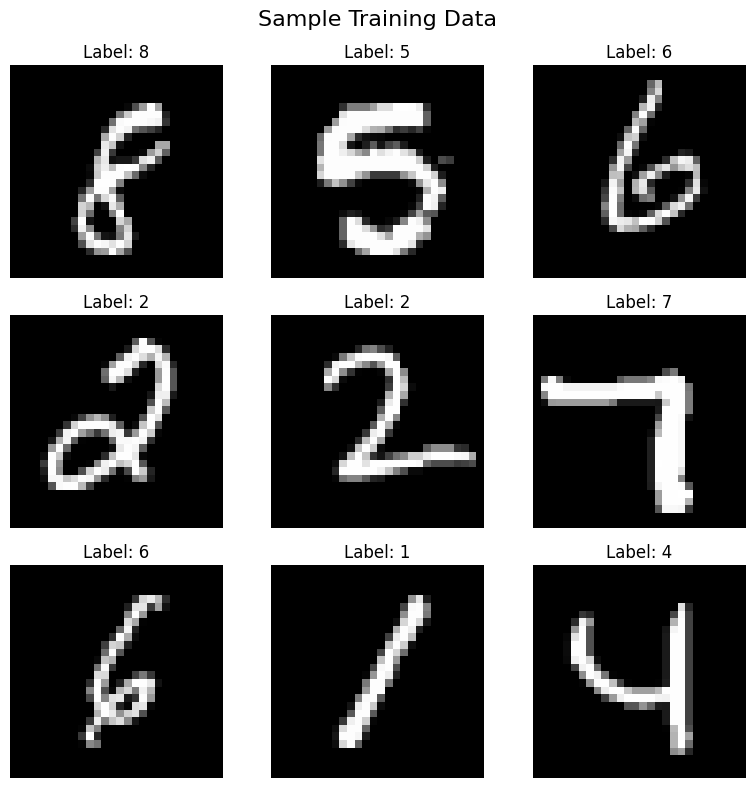

In [9]:
# Menampilkan 9 sample gambar dari data train
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Training Data", fontsize=16)
plt.tight_layout()
plt.show()


Augmentasi Data

In [10]:

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


### 5. Bangun Model CNN

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 6. Compile Model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### 7. Latih Model

In [13]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop, lr_scheduler]
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.8083 - loss: 0.6470 - val_accuracy: 0.9686 - val_loss: 0.1039 - learning_rate: 0.0010
Epoch 2/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.9622 - loss: 0.1192 - val_accuracy: 0.9857 - val_loss: 0.0446 - learning_rate: 0.0010
Epoch 3/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9711 - loss: 0.0926 - val_accuracy: 0.9898 - val_loss: 0.0357 - learning_rate: 0.0010
Epoch 4/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9762 - loss: 0.0739 - val_accuracy: 0.9888 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 5/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9792 - loss: 0.0666 - val_accuracy: 0.9905 - val_loss: 0.0332 - learning_rate: 0.0010
Epoch 6/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9806 - loss: 0.0630 - val_accuracy: 0.9898 - val_loss: 0.0304 - learning_rate: 0.0010
Epoch 7/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9819 - loss: 0.0567

### 8. Evaluasi Akurasi

In [14]:
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9951 - loss: 0.0159
Validation Accuracy: 99.55%


### 9. Visualisasi Akurasi dan Loss

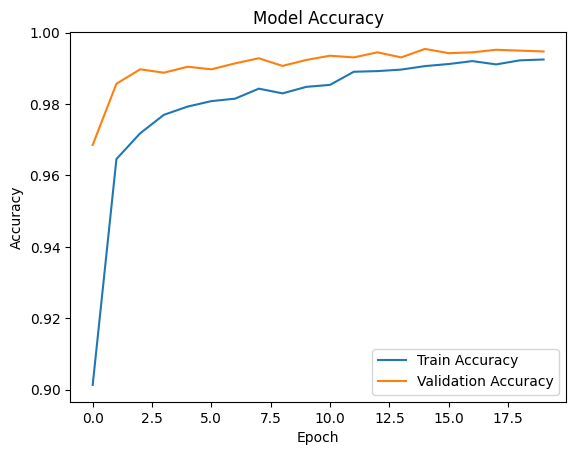

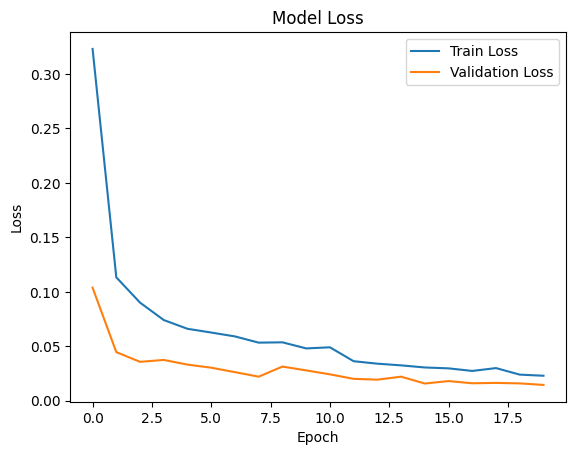

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 10. Confusion Matrix & Classification Report

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


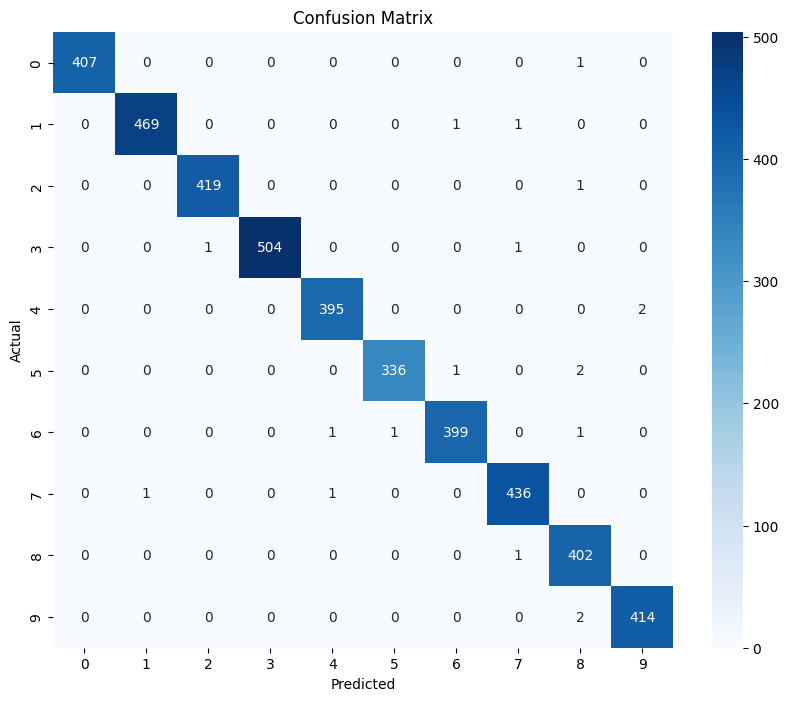

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00       420
           3       1.00      1.00      1.00       506
           4       0.99      0.99      0.99       397
           5       1.00      0.99      0.99       339
           6       1.00      0.99      0.99       402
           7       0.99      1.00      0.99       438
           8       0.98      1.00      0.99       403
           9       1.00      1.00      1.00       416

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



In [16]:
y_pred = np.argmax(model.predict(X_valid), axis=1)
conf_mat = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_valid, y_pred))


### 11. Prediksi dan Simpan Submission

In [17]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels.astype(int)
})
submission.to_csv('submission.csv', index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


### 12. Visualisasi Hasil Prediksi

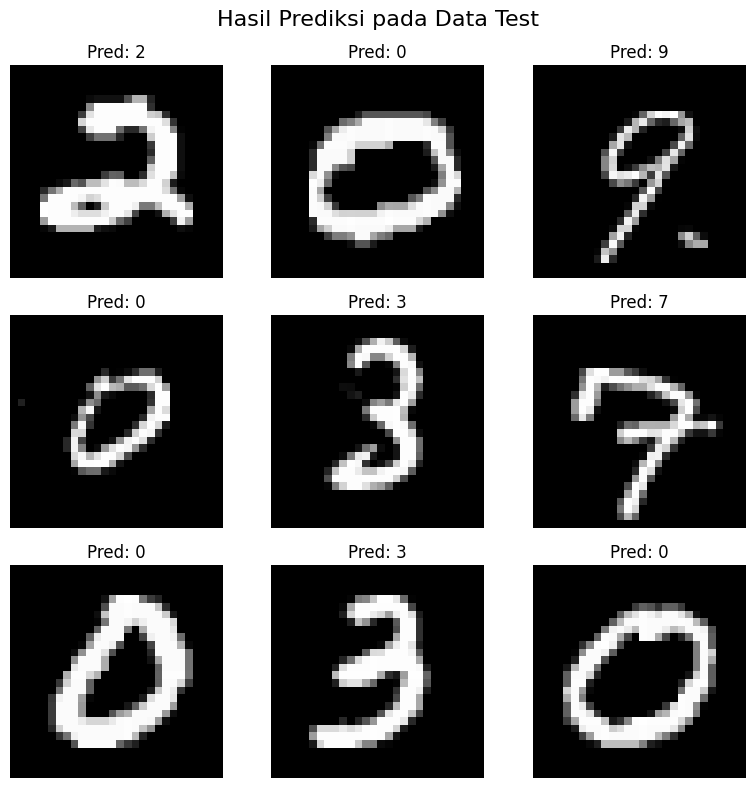

In [18]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.suptitle("Hasil Prediksi pada Data Test", fontsize=16)
plt.tight_layout()
plt.show()
